In [68]:
import numpy as np
from matplotlib import pyplot as plt

In [69]:
### mel scale equation
def mel_scale(f):
    B=1125*np.log(1+ f / 700)
    return B    

In [70]:
### mel scale equation
def bark_scale(f):
    B=13*np.arctan(0.00076*f ) + 3.5*np.arctan (( f / 7500)**2 )
    return B    

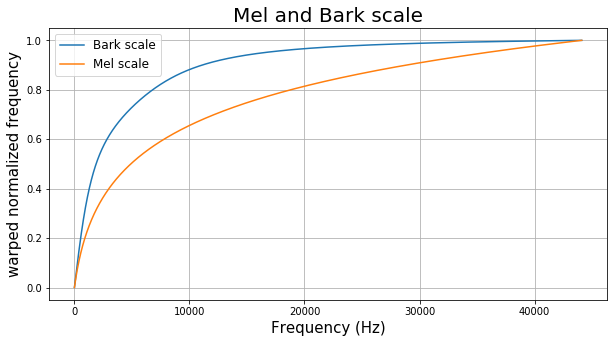

In [75]:
f=np.arange(44100)+1
### mel scale
M=mel_scale(f)
M=M/np.amax(M)

### bark scale
B=bark_scale(f)
B=B/np.amax(B)

fig = plt.figure(figsize = (10,5))
plt.plot(f,B,label="Bark scale");
plt.plot(f,M,label="Mel scale");
plt.xlabel("Frequency (Hz)",fontsize=15)
plt.ylabel("warped normalized frequency",fontsize=15)
plt.legend(loc='best',fontsize=12)
plt.title('Mel and Bark scale',fontsize=20)
plt.grid(True)
plt.show()

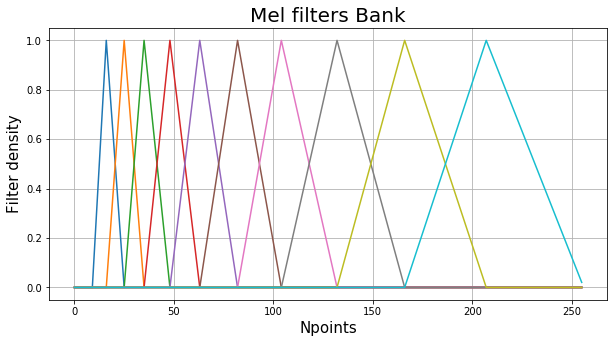

In [124]:
# Bank filter
fl=300 #lower frequency 
fu=8000 #upper frequency 
M=10; #Number of filters
mel_l=1125*np.log(1+fl/700) #freq2mel
mel_u=1125*np.log(1+fu/700) #freq2mel
m=np.linspace(mel_l,mel_u,M+2) #freq2mel
h=700*(np.exp(m/1125)-1)  #mel2freq
npoints=np.int_(512/2) #points of FFT
f= np.floor((npoints+1)*h/fu) #mel2npoints 
bankF=np.zeros((M,npoints)) #Initialize bank filter 
fig = plt.figure(figsize = (10,5))
for i in range(1,M+1):
    int=np.arange(0,f[i-1])
    bankF[i-1,np.int_(int)]=0
    int=np.arange(f[i-1],f[i])
    bankF[i-1,np.int_(int)]=(int-f[i-1])/(f[i]-f[i-1])
    int=np.arange(f[i],f[i+1])
    bankF[i-1,np.int_(int)]=(f[i+1]-int)/(f[i+1]-f[i]);
    plt.plot(bankF[i-1,:])
plt.xlabel("Npoints",fontsize=15)
plt.ylabel("Filter density",fontsize=15)
plt.title('Mel filters Bank',fontsize=20)
plt.grid(True)
plt.show()